In [1]:
import sys
sys.path.append('../')
import importlib

import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import seaborn as sbn
from contextlib import redirect_stdout
import json
import ast

import UsefullFunctions as ufn

/home/martina/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
trials = 1000

ufn.frates_labels(trials)

iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000


In [3]:
with open('frates_labels.json', 'r') as json_file:
    data = json.load(json_file)

frates_actor = np.array(data["frates_actor"])
frates_critic = np.array(data["frates_critic"])
final_actions = np.array(data["final_actions"])
right_values = np.array(data["right_values"])
left_values = np.array(data["left_values"])
global_values = np.array(data["global_values"])
stimuli = np.array(data["stimuli"])

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


average over 10 epochs of test scores:  0.8915000000000001
average over 10 epochs of test random scores:  0.5155000000000001
----------
training score:  0.8685857321652065
test score:  0.88 
----------


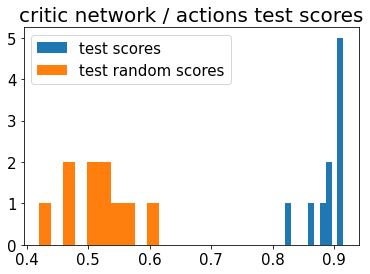

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


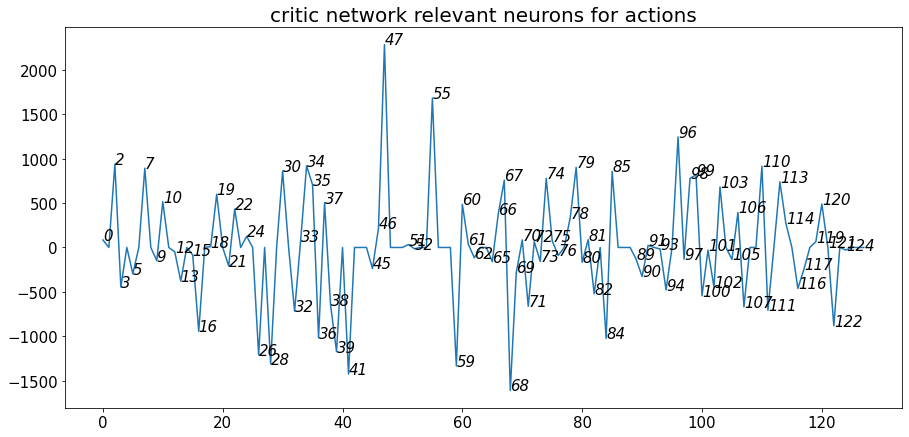

In [4]:
#net = {"X" : frates_actor, "network" : "actor"}
net = {"X" : frates_critic, "network" : "critic"}

label = {"Y" : final_actions, "label" : "actions"}
#label = {"Y" : right_values, "label" : "right_values"}
#label = {"Y" : left_values, "label" : "left_values"}
#label = {"Y" : global_values, "label" : "global_values"}

#model = {"model" : 'perceptron', "param" : 0}
model = {"model" : 'perceptronL1', "param" : 0.005}
#model = {"model" : 'svm', "param" : 0.001}

ufn.rel_nurons(X=net["X"], Y=label["Y"], model=model["model"], C=model["param"], network=net["network"], label=label["label"])

[47 55 68 41 59 28 96 26 39 84]
[ 56  51  70 109  50  57  48 121  76 123]


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


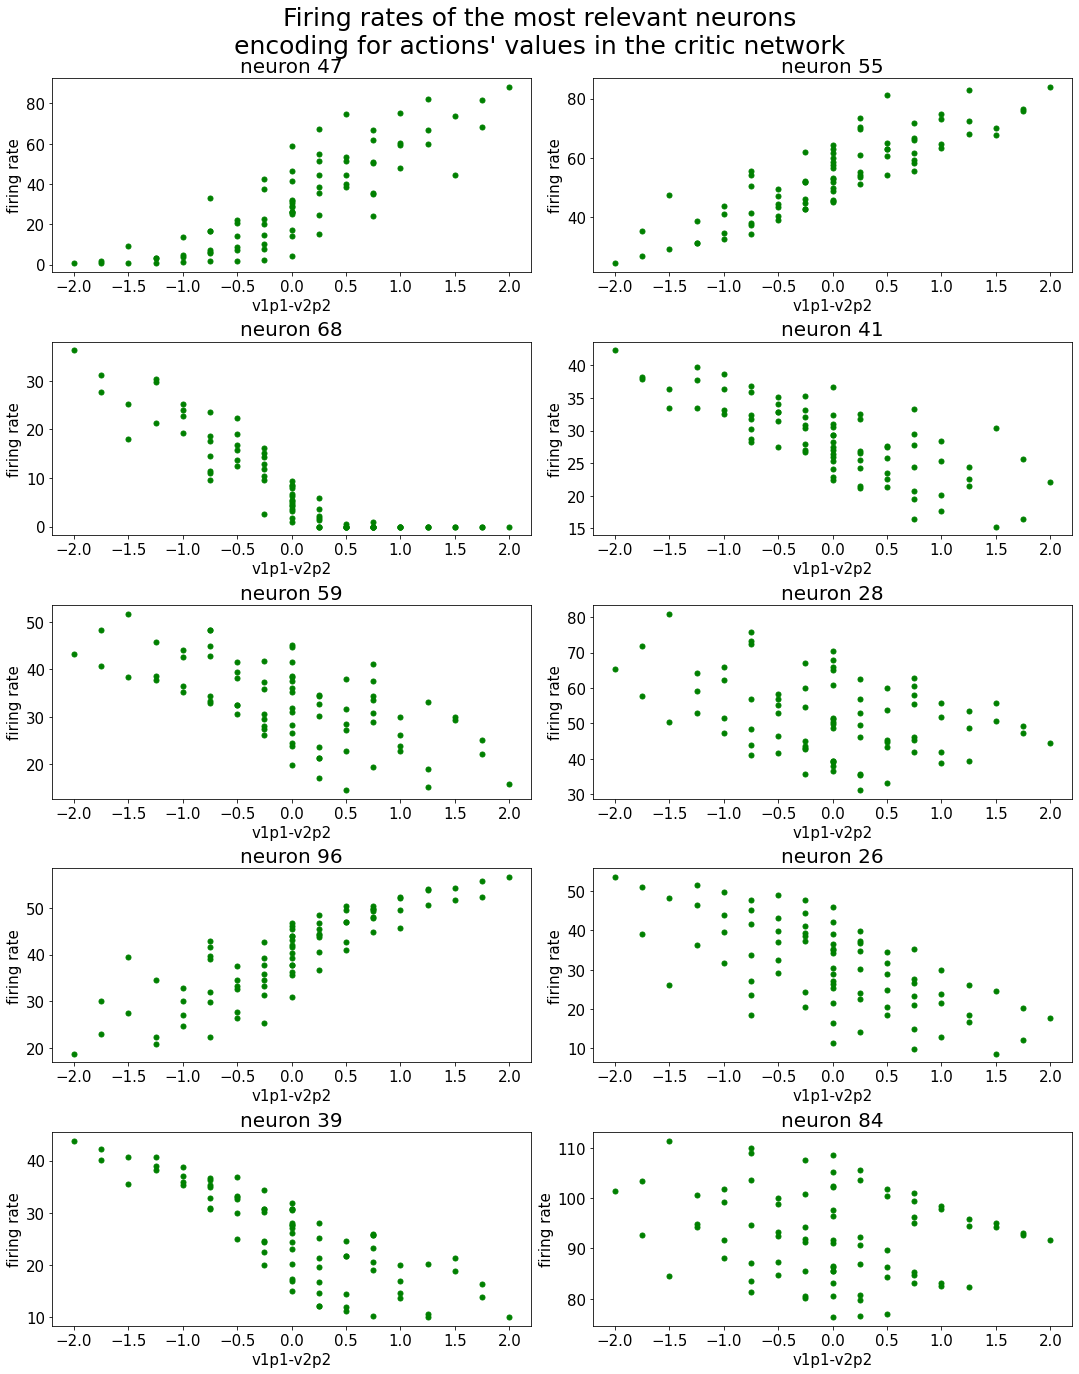

In [5]:
importlib.reload(ufn)

if net["network"] == "actor":
    with open("clf_data/"+label["label"]+"/relevant_neurons_actor.txt", 'r') as file:
        file_content = file.read()
else:
    with open("clf_data/"+label["label"]+"/relevant_neurons_critic.txt", 'r') as file:
        file_content = file.read()

parsed_content = ast.literal_eval(file_content)
relevant_neurons = np.asarray(parsed_content)
print(relevant_neurons)

check = True
random_neurons = np.zeros(len(relevant_neurons))
while check is True:
    random_neurons = np.random.randint(0, 128, 10)
    bool_array = np.isin(random_neurons, relevant_neurons)
    check = any(bool_array)
print(random_neurons)

ufn.tuning_curves(relevant_neurons, net["X"], stimuli, net["network"], label["label"])

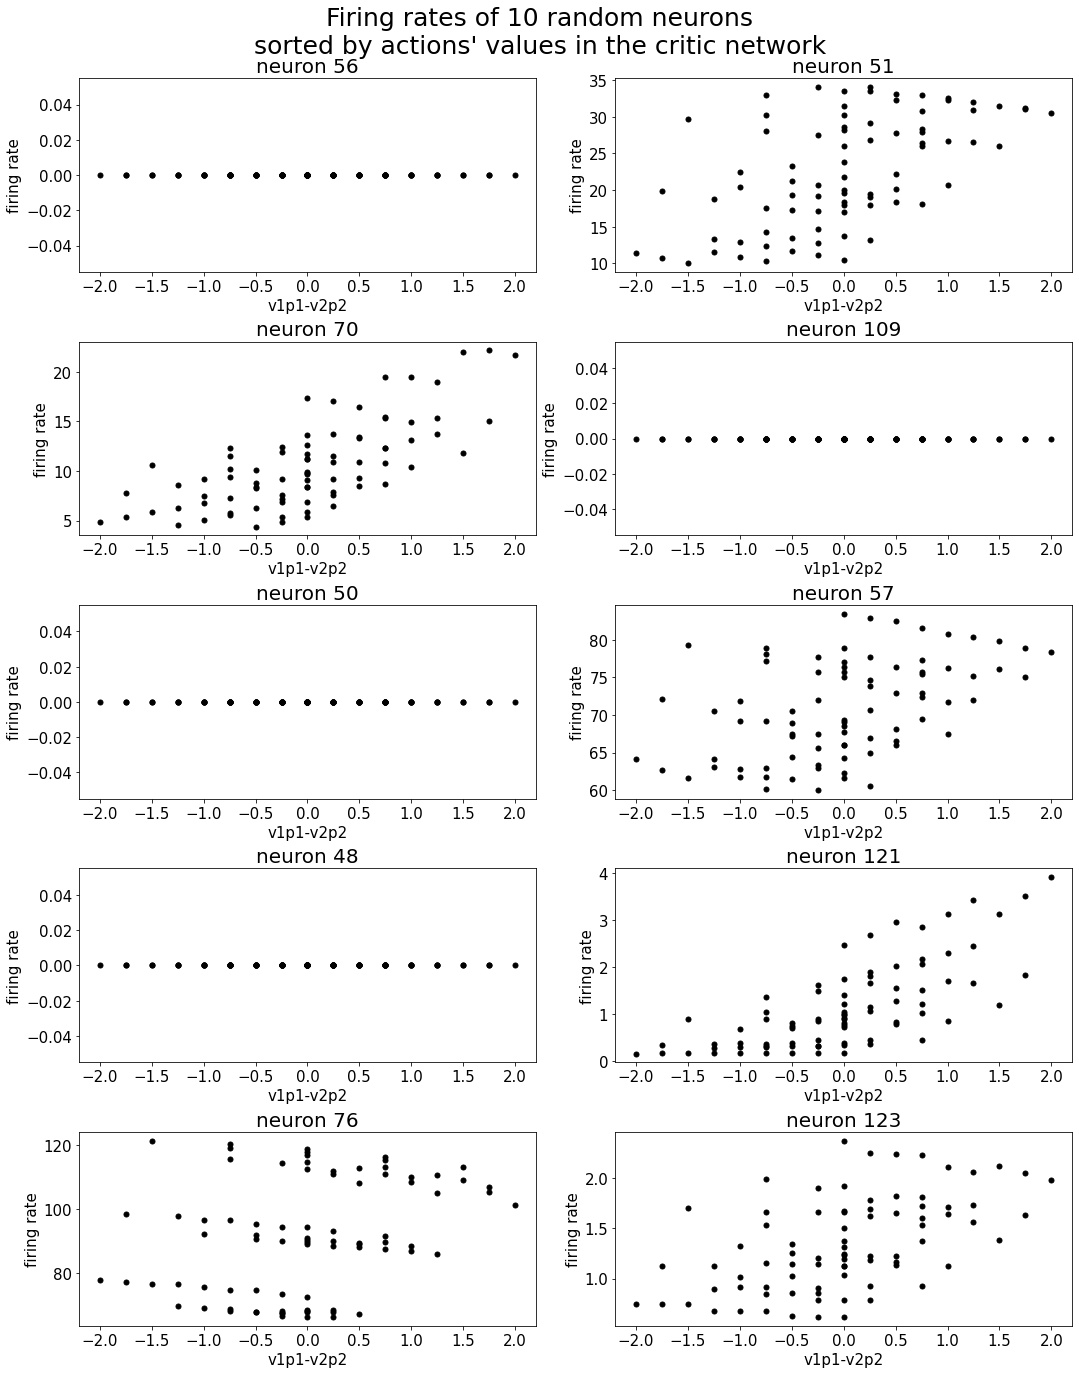

In [6]:
importlib.reload(ufn)

ufn.tuning_curves(random_neurons, net["X"], stimuli, net["network"], label["label"]+"_random")